#Project Module 7: Integration
#CPSMA 4413-01 Dr. Jacob's Numerical Methods
Reed Barker and Seth Jensen

#Riemann Integration

In [ ]:
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

In [245]:
def f(x):
  #return ((-(x**2)) + (5*x))
  #return x**2
  return (x-1.65)**3 - (x-1.35) + 5

def exactIntegral(f, a, b):
  return integrate.quad(f, a, b)[0] - integrate.quad(f, a, a)[0]

def riemannSum(a, b, n, method):
  rectWidth = (b - a) / n  # width of each rectangle
  x = a  # start at left endpoint
  sum = 0  # initialize the sum
  
  if method == 'right':
    for i in range(n):
      x += rectWidth  # move to right endpoint
      sum += f(x) * rectWidth  # add area of rectangle
          
  elif method == 'left':
    for i in range(n):
      x += rectWidth  # move to right endpoint
      sum += f(x) * rectWidth  # add area of rectangle
               
  elif method == 'center':
    x += rectWidth / 2  # start at midpoint of first rectangle
    for i in range(n):
      sum += f(x) * rectWidth  # add area of rectangle
      x += rectWidth  # move to right endpoint of rectangle
          
  else:
    print("Invalid method specified. Must be 'right', 'left', or 'center'.")
    return None
  
  return sum

def trapezoidalRule(a, b, n):
  h = (b - a) / n
  x = a
  sum = f(x)

  for i in range(1, n):
      x += h
      sum += 2 * f(x)

  sum += f(b)
  integral = (h / 2) * sum

  return integral

def riemannErrorTable(f, a, b, rectCount, method):
  results = []
  for n in rectCount:
    riemannVal = riemannSum(a, b, n, method)
    trapezoidVal = trapezoidalRule(a, b, n)
    exactVal = exactIntegral(f, a, b)

    rtDiff = riemannVal - trapezoidVal
    reDiff = riemannVal - exactVal
    teDiff = trapezoidVal - exactVal

    errorDiff = exactVal - riemannVal
    error = ((exactVal - riemannVal) / exactVal) * 100
    results.append((n, riemannVal, trapezoidVal, exactVal, rtDiff, reDiff, teDiff))

  headers = ['Rectangles', method+' Riemann', "Trapezoidal", 'Exact', 'Riemann/Trapezoidal Difference', 'Riemann/Exact Difference', 'Trapezoidal/Exact Difference']
  table = tabulate(results, headers=headers)
  print(table)

def plotRiemann(a, b, n, method):
  # Define the x and y values for the function
  x = np.linspace(a, b, 100)
  y = f(x)

  rectWidth = (b - a) / n  # width of each rectangle

  x_rect = np.linspace(a+rectWidth/2, b-rectWidth/2, n)
        
  # Compute the y values for the rectangles using the x values
  y_rect = f(x_rect)

  # Plot the function and the rectangles
  fig, ax = plt.subplots()
  ax.plot(x, y, 'b', linewidth=2)

  if method == "right":
    ax.bar(x_rect, y_rect, width=-rectWidth, alpha=0.3, align='edge', edgecolor='b')
    
  elif method == "left":
    ax.bar(x_rect, y_rect, width=rectWidth, alpha=0.3, align='edge', edgecolor='b')

  elif method == "center":
    ax.bar(x_rect, y_rect, width=rectWidth, alpha=0.3, align='center', edgecolor='b')

  else:
    print("Invalid method specified. Must be 'right', 'left', or 'center'.")

  ax.set_title('Riemann sum of $f(x) = -(x^2) + 5x$ over $[0, 5]$ using the ' + method + ' endpoint rule with '+str(n)+' rectangles') #Title

  plt.show()

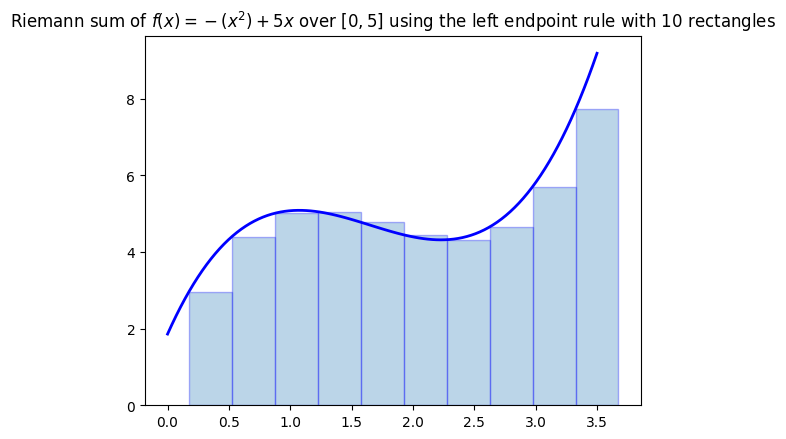

  Rectangles    left Riemann    Trapezoidal    Exact    Riemann/Trapezoidal Difference    Riemann/Exact Difference    Trapezoidal/Exact Difference
------------  --------------  -------------  -------  --------------------------------  --------------------------  ------------------------------
           5         19.8244        17.2611  17.1754                       2.56331                     2.64906                         0.08575
          10         18.4785        17.1968  17.1754                       1.28166                     1.30309                         0.0214375
          20         17.8216        17.1807  17.1754                       0.640828                    0.646187                        0.00535937
          40         17.4971        17.1767  17.1754                       0.320414                    0.321754                        0.00133984
          80         17.3359        17.1757  17.1754                       0.160207                    0.160542               

In [250]:
rectCount = [5,10,20,40,80,160,320,640,100000]

a = 0
b = 3.5
n = 10
method = "left"

plotRiemann(a, b, n, method)
riemannErrorTable(f, a, b, rectCount, method)

#Start your Report and Comment on the Following

(a) Describe your findings in words.


(b) Discuss why your estimate was an over or under estimate. How did the graph show you this.

(c) Given a strictly increasing function, which algorithm would you choose? What if it was decreasing? What about undulating?